In [25]:
from sklearn.datasets import load_boston

ds = load_boston()
x = ds.data
y = ds.target
x = x[:50]
y = y[:50]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [26]:
from neuralregressionnetwork import NeuralRegressionNetwork
nn = NeuralRegressionNetwork(no_of_neurons=[5,5,5])
ls = nn.train(x_train, y_train, epochs=10000, learning_rate=0.1, x_val=x_test, y_val=y_test)

In [27]:
nn.score(x_test,y_test)

8.872175666177254

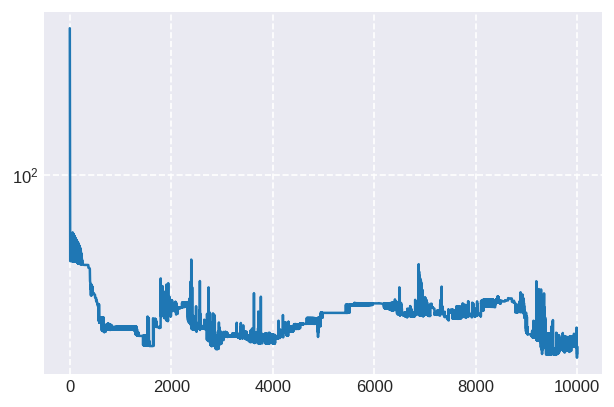

In [28]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-dark')
fig, ax = plt.subplots(dpi=120)
ax.grid(linestyle='--', linewidth=1)
ax.plot(range(len(ls)),np.array(ls))
ax.set_yscale('log')

In [29]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(x_train,y_train)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, svr.predict(x_test))

22.64035217774515

In [30]:
from tensorflow import keras
from tensorflow.keras.layers import Dense
tf_model = keras.Sequential()
tf_model.add(Dense(5,activation=keras.activations.relu,input_dim=13))
tf_model.add(Dense(5,activation=keras.activations.relu))
tf_model.add(Dense(5,activation=keras.activations.relu))
tf_model.add(Dense(1))
tf_model.compile(optimizer='adam',loss=keras.losses.mean_squared_error)
tf_model.fit(x_train, y_train,verbose=0,epochs=1000)
tf_model.evaluate(x_test,y_test)

1/1 [==============================] - 0s 67ms/step - loss: 19.0004


19.000404357910156